# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# YOUR CODE HERE

file_path = "560_bodyfat.tsv.gz"
df = pd.read_csv(file_path, sep = '\t', compression = 'gzip')

df = df.dropna() # drop rows with missing data

target_col = "target" # Extract the target column

df = df.iloc[:, :10].copy() # Keep first 10 columns + target
df[target_col] = pd.read_csv(file_path, sep="\t", compression="gzip")[target_col]

print(df.sample(10))

     Density   Age  Weight  Height       Neck       Chest     Abdomen  \
65    1.0313  55.0  183.50   67.50  40.900002  103.000000  100.300003   
99    1.0484  47.0  197.00   72.00  40.000000  107.500000   94.000000   
82    1.0568  64.0  190.25   72.75  39.299999  103.099998   97.800003   
190   1.0728  41.0  153.00   69.25  36.400002   91.400002   80.599998   
45    1.0670  43.0  164.25   73.25  35.700001   96.599998   81.500000   
246   1.0308  69.0  215.50   70.50  40.799999  113.699997  107.599998   
55    1.0473  54.0  198.00   72.00  39.900002  107.599998  100.000000   
138   1.0481  40.0  168.25   71.25  34.299999   98.300003   88.500000   
92    1.0795  47.0  165.25   70.50  37.500000   97.199997   83.099998   
125   1.0587  46.0  167.00   67.00  36.599998  101.000000   89.900002   

            Hip      Thigh       Knee     target  
65   104.199997  64.800003  40.200001  30.000000  
99   103.699997  62.700001  39.000000  22.200001  
82    99.599998  58.900002  39.000000  18.4

YOUR ANSWERS HERE

I assigned the .tsv.gz file path to file_path and loaded the dataset into df using pandas.read_csv() with tab separation and gzip decompression. Following the instructions, I used df.dropna() to remove any rows with missing values. Since the dataset contains more than ten columns, I limited the primary analysis to the first 10 columns but made sure to keep the target column as well. After selecting these columns, I displayed a random sample of 10 rows using df.sample(10) to verify that the data loaded correctly. Since this dataset has more than 10 columns I have limited to first 10 as instructed, and then extract the target column. 

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:
# YOUR CODE HERE

column_names = df.columns.tolist()
print(column_names)

['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'target']


YOUR ANSWERS HERE

( I limit my analysis to first 10 columns (as instructed in problem 1) and then extract the target column)
1. Density: Body density (mass/volume), measured using underwater weighing. This value is used to compute body fat percentage. 
2. Age: Person's age in years
3. Weight: Body weight measured in pounds (lbs). 
4. Height: Person's height in inches. 
5. Neck: Neck circumference measured in centimeters.
6. Chest: Chest circumference (cm), measured around the fullest part of the chest.
7. Abdomen: Abdomen circumference (cm), measured at the level of the iliac crest; highly correlated with body fat.
8. Hip: Hip circumference (cm), measured at the widest point.
9. Thigh: Thigh circumference (cm), measured around the maximum thigh girth.
10. Knee: Knee circumference (cm), measured around the knee joint.
11. Target: Percent body fat estimated using Siri’s (1956) equation. This is the main output variable derived from measured body density.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

Shape: (252, 11)

Summary Statistics:
          Density         Age      Weight      Height        Neck       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   44.884921  178.924405   70.148810   37.992064  100.824206   
std      0.019031   12.602040   29.389160    3.662856    2.430913    8.430476   
min      0.995000   22.000000  118.500000   29.500000   31.100000   79.300003   
25%      1.041400   35.750000  159.000000   68.250000   36.400002   94.350000   
50%      1.054900   43.000000  176.500000   70.000000   38.000000   99.649998   
75%      1.070400   54.000000  197.000000   72.250000   39.425001  105.375002   
max      1.108900   81.000000  363.149994   77.750000   51.200001  136.199997   

          Abdomen         Hip       Thigh        Knee      target  
count  252.000000  252.000000  252.000000  252.000000  252.000000  
mean    92.555952   99.904762   59.405952   38.590476   19.150794  
std     10.783077    7.16405

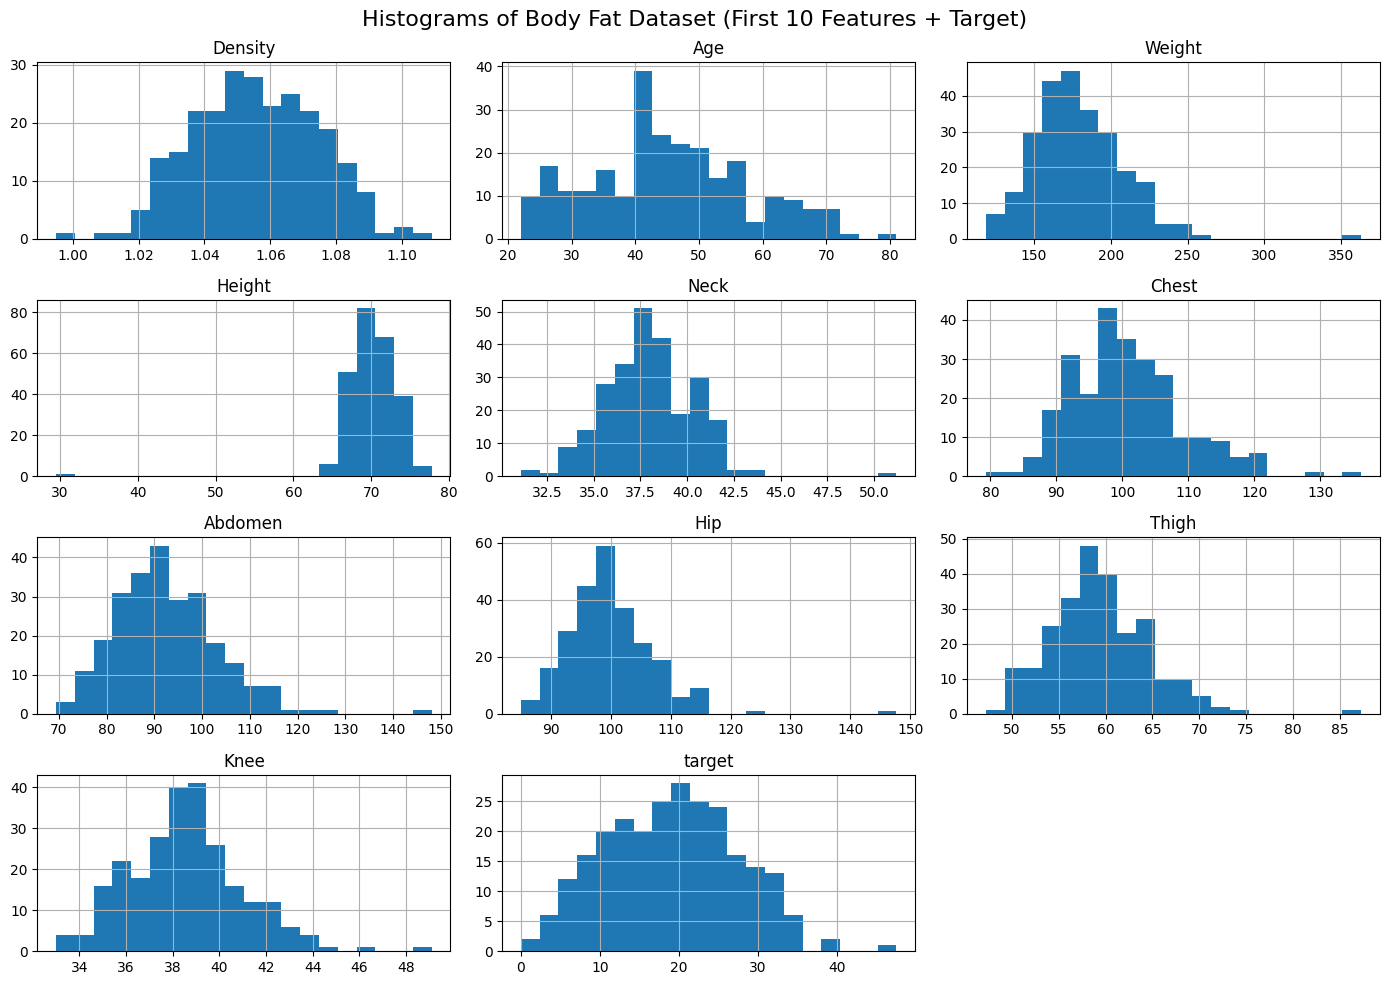

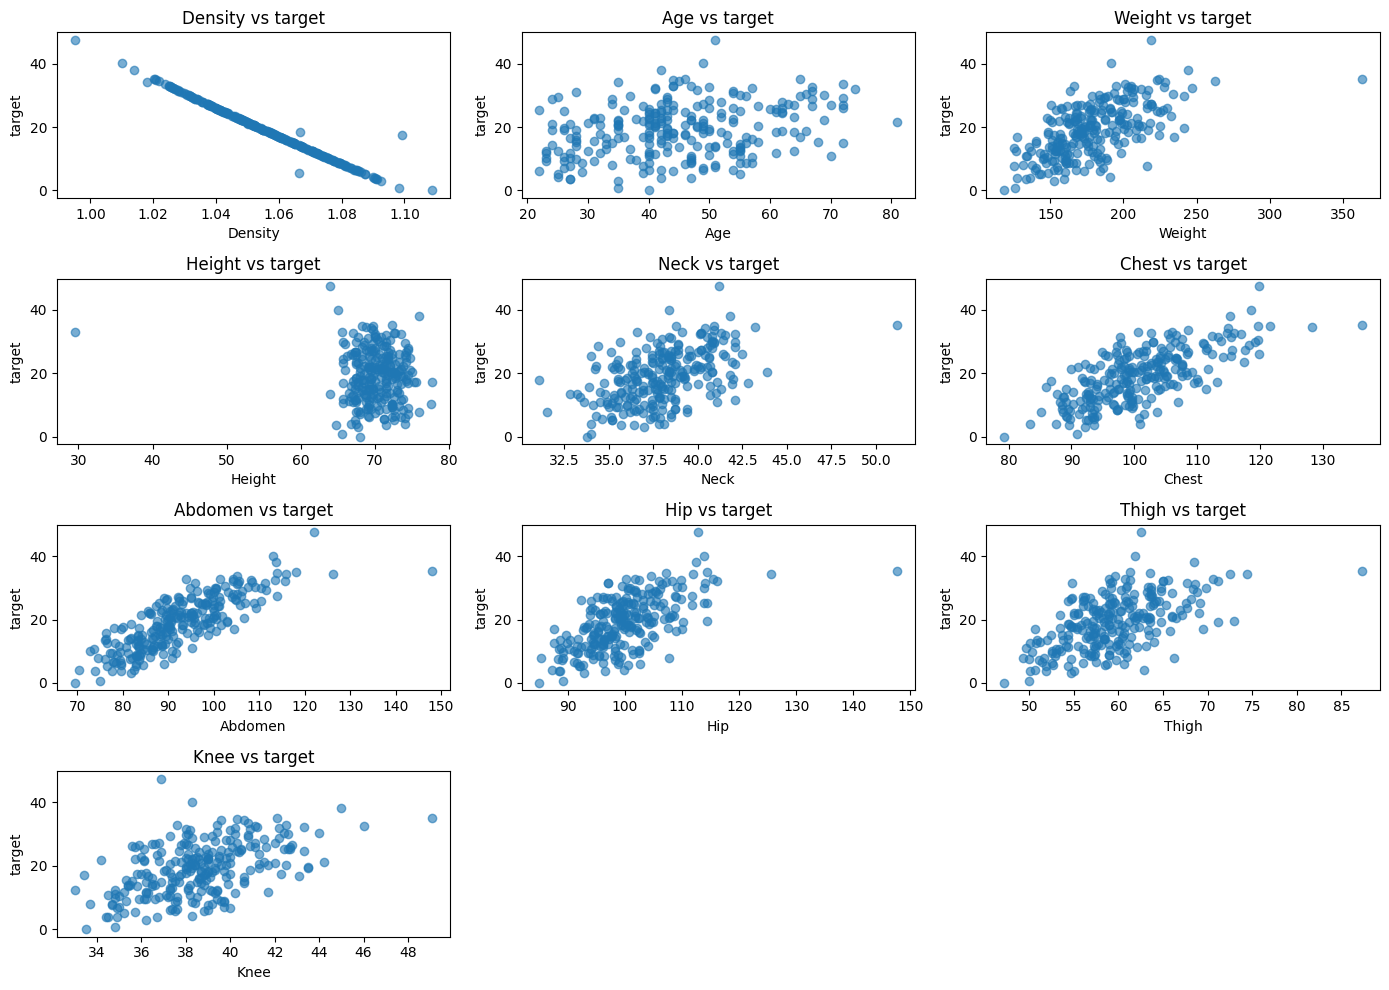

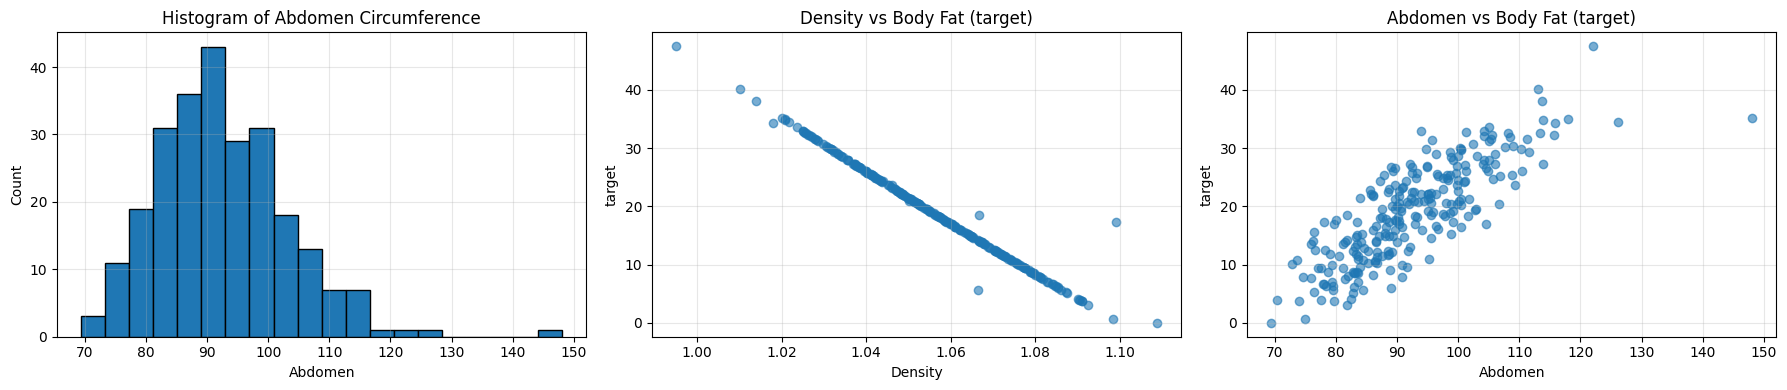

In [6]:
# YOUR CODE HERE

# Basic info
print("Shape:", df.shape)
print("\nSummary Statistics:")
print(df.describe())

# Column selection
target_col = "target"

# Use the first 10 input columns (problem instructions)
# Density, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee
feature_cols = df.columns[0:10]

print("\nColumns used for EDA:", list(feature_cols))

# Histograms (first 10 features + target)
df[list(feature_cols) + [target_col]].hist(figsize=(14, 10), bins=20)
plt.suptitle("Histograms of Body Fat Dataset (First 10 Features + Target)", fontsize=16)
plt.tight_layout()
plt.show()

# Scatter plots: each feature vs TARGET (grid)
plt.figure(figsize=(14, 10))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(4, 3, i)
    plt.scatter(df[col], df[target_col], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f"{col} vs {target_col}")
plt.tight_layout()
plt.show()


#   Three individual charts picked from the EDA above (combined into one figure with subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Chart 1: Histogram of Abdomen
axes[0].hist(df["Abdomen"], bins=20, edgecolor="black")
axes[0].set_xlabel("Abdomen")
axes[0].set_ylabel("Count")
axes[0].set_title("Histogram of Abdomen Circumference")
axes[0].grid(True, alpha=0.3)

# Chart 2: Density vs Body Fat (target)
axes[1].scatter(df["Density"], df[target_col], alpha=0.6)
axes[1].set_xlabel("Density")
axes[1].set_ylabel(target_col)
axes[1].set_title("Density vs Body Fat (target)")
axes[1].grid(True, alpha=0.3)

# Chart 3: Abdomen vs Body Fat (target)
axes[2].scatter(df["Abdomen"], df[target_col], alpha=0.6)
axes[2].set_xlabel("Abdomen")
axes[2].set_ylabel(target_col)
axes[2].set_title("Abdomen vs Body Fat (target)")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

NOTEWORTHY (Chart 1: Histogram of Abdomen Circumference)
The histogram of abdomen circumference is noticeably right-skewed, with most values concentrated in a moderate range around 85–100 cm and only a small number of individuals showing much larger measurements. This distribution suggests that while the majority of participants fall within a typical abdominal size, a minority exhibit significantly higher values that extend the tail of the distribution. This is noteworthy because abdomen circumference is one of the strongest predictors of body fat in the dataset, and its skewed shape reflects how increases in abdominal size are closely tied to higher body fat percentages.

NOTEWORTHY (Chart 2: Density vs Body Fat Percentage (Target))
The scatter plot of Density vs. Body Fat Percentage stands out because it forms an almost perfectly straight negative line. Unlike the other features, this pattern reflects a mathematical relationship rather than a purely statistical one. Body fat percentage in this dataset is computed directly from body density using the Siri equation, which is why the points align so precisely along a single downward trend. Higher density corresponds to lower body fat, and lower density corresponds to higher body fat, making Density the most deterministic and strongly linked feature in the entire dataset.

NOTEWORTHY (Chart 3: Abdomen vs Body Fat Percentage)
The scatter plot of Abdomen circumference versus Body Fat Percentage shows one of the strongest and most consistent positive relationships in the dataset. As abdomen size increases, body fat rises in a clear upward trend with relatively little overlap compared to other features such as weight or age. This indicates that abdominal circumference is a highly informative predictor of body fat and varies in a more systematic way than other body measurements. The tight clustering along the upward slope suggests that abdomen is one of the key physical indicators of overall body fat in this dataset.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

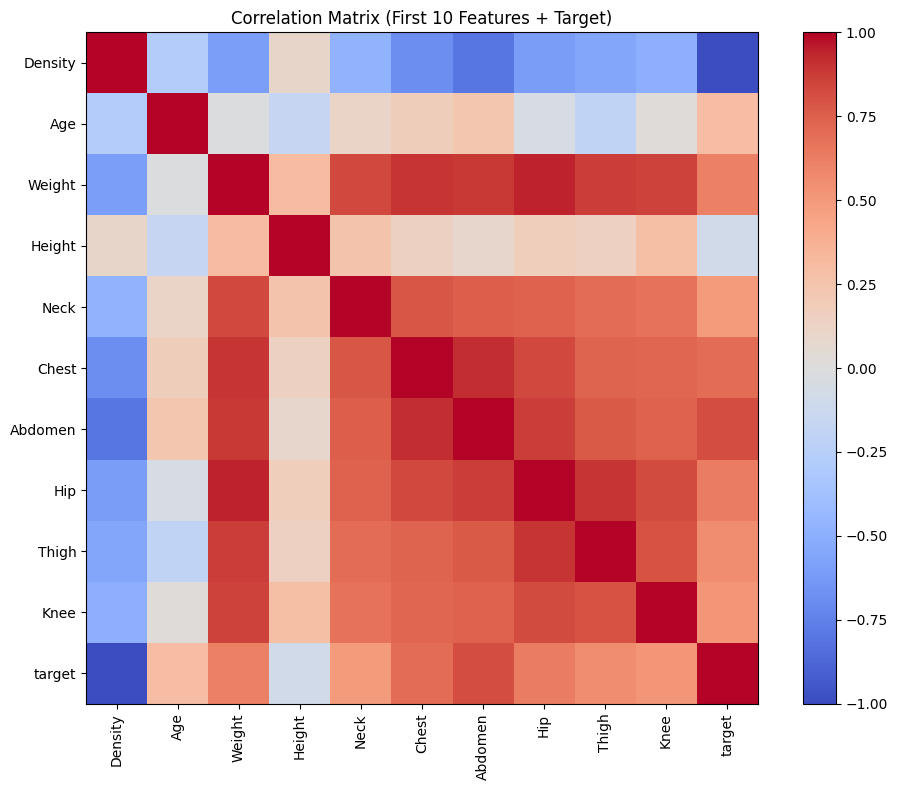

In [7]:
# YOUR CODE HERE

target_col = "target"
input_cols = df.columns[0:10]   # first 10 features

# Add target column 
corr_full = df[list(input_cols) + [target_col]].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_full, cmap="coolwarm", interpolation="nearest", vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(range(len(corr_full.columns)), corr_full.columns, rotation=90)
plt.yticks(range(len(corr_full.columns)), corr_full.columns)

plt.title("Correlation Matrix (First 10 Features + Target)")
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

From the correlation matrix, Chest and Abdomen show the strongest positive correlation. Their correlation value is very close to +1.00, indicating that as abdominal circumference increases, chest circumference tends to increase as well. Therefore, Chest and Abdomen is the most highly correlated pair of features in the first 10 input columns

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [8]:
# YOUR CODE HERE
#ANSWER IN DESCRIPTION


YOUR ANSWERS HERE

Random forest Regressor: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor  
2. https://www.geeksforgeeks.org/machine-learning/random-forest-algorithm-in-machine-learning/  

Linear Regression:
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2. https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/ 

Support Vector Regression:
1. https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
2. https://www.geeksforgeeks.org/machine-learning/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/    

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression:  L2 (MSE) = 1.5461,  L1 (MAE) = 0.4680
Random Forest:  L2 (MSE) = 0.2279,  L1 (MAE) = 0.1341
SVR (RBF):  L2 (MSE) = 26.8592,  L1 (MAE) = 4.1944


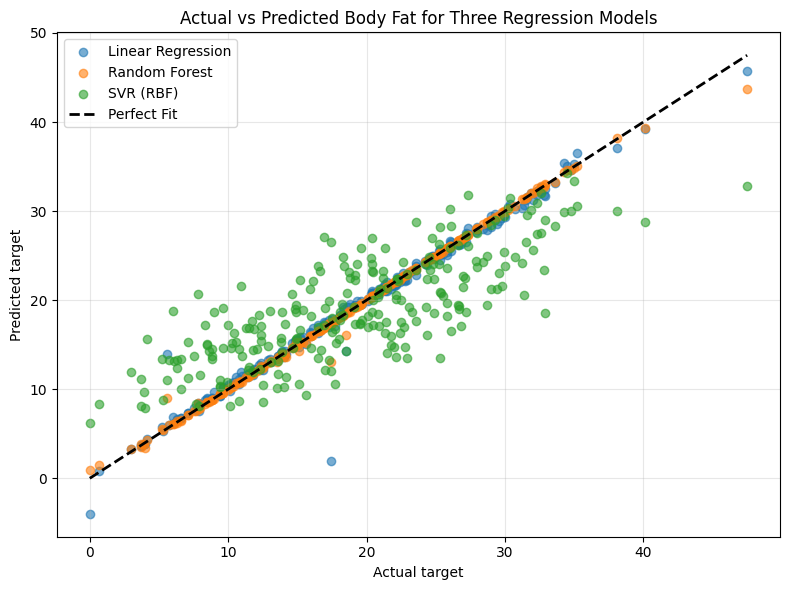

In [9]:
# YOUR CODE HERE

from sklearn import linear_model, ensemble, svm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Data setup
target_col = "target"

# First 10 input features: Density, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee
input_cols = df.columns[0:10]

X = df[input_cols].values
y = df[target_col].values

# Define and fit models
lin = linear_model.LinearRegression()
rf  = ensemble.RandomForestRegressor(n_estimators=200, random_state=0)
svr = svm.SVR(kernel="rbf", C=5.0, epsilon=0.1)

lin.fit(X, y)
rf.fit(X, y)
svr.fit(X, y)

# Predictions
y_pred_lin = lin.predict(X)
y_pred_rf  = rf.predict(X)
y_pred_svr = svr.predict(X)

preds = {
    "Linear Regression": y_pred_lin,
    "Random Forest": y_pred_rf,
    "SVR (RBF)": y_pred_svr,
}

# Compute L1 and L2 losses
losses = {
    "Linear Regression": {
        "L2 (MSE)": mean_squared_error(y, y_pred_lin),
        "L1 (MAE)": mean_absolute_error(y, y_pred_lin),
    },
    "Random Forest": {
        "L2 (MSE)": mean_squared_error(y, y_pred_rf),
        "L1 (MAE)": mean_absolute_error(y, y_pred_rf),
    },
    "SVR (RBF)": {
        "L2 (MSE)": mean_squared_error(y, y_pred_svr),
        "L1 (MAE)": mean_absolute_error(y, y_pred_svr),
    },
}


for name, vals in losses.items():
    print(f"{name}:  L2 (MSE) = {vals['L2 (MSE)']:.4f},  L1 (MAE) = {vals['L1 (MAE)']:.4f}")

# Plot actual vs predicted for all three models
plt.figure(figsize=(8, 6))

plt.scatter(y, y_pred_lin, alpha=0.6, label="Linear Regression")
plt.scatter(y, y_pred_rf,  alpha=0.6, label="Random Forest")
plt.scatter(y, y_pred_svr, alpha=0.6, label="SVR (RBF)")

# Reference line y = x (perfect predictions)
y_min, y_max = y.min(), y.max()
plt.plot([y_min, y_max], [y_min, y_max], "k--", linewidth=2, label="Perfect Fit")

plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Actual vs Predicted Body Fat for Three Regression Models")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

To compare different approaches to predicting body fat percentage, I selected three regression models that represent distinct models: Linear Regression, Random Forest, and Support Vector Regression. 

Linear Regression serves as the baseline because many of the body measurements in the dataset show strong linear relationships with the target. The model performed well, achieving low error values (MSE = 1.55, MAE = 0.47), and its predictions closely aligned with the ideal y = x line in the plot.

Random Forest was chosen as a nonlinear ensemble method capturing interactions or patterns that a linear model might miss. This model produced the best performance of the three (MSE = 0.23, MAE = 0.13), with predictions clustering close to the ideal line. Its strong accuracy suggests that although the dataset is mostly linear, small nonlinearities and variable interactions contribute meaningfully to improved prediction.

SVR model with an RBF kernel was chosen to explore a more flexible, kernel-based approach. However, without proper scaling or hyperparameter tuning, SVR performed poorly on this dataset (MSE = 26.86, MAE = 4.19). The actual vs. predicted plot shows the model scattering far from the ideal line, indicating that SVR is highly sensitive to feature scaling and requires more extensive tuning to be effective.

The results show that both Linear Regression and Random Forest fit the dataset well, with Random Forest providing the best predictive accuracy. Meanwhile, SVR highlights how model performance can degrade significantly when data preprocessing and parameter tuning are not properly aligned with the model’s requirements.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [10]:
# YOUR CODE HERE

from sklearn import linear_model, ensemble, svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

target_col = "target"
input_cols = df.columns[0:10] # first 10 input features

X = df[input_cols].values
y = df[target_col].values

# Same three model classes as in Problem 6
models = {
    "Linear Regression": linear_model.LinearRegression(),
    "Random Forest": ensemble.RandomForestRegressor(
        n_estimators=200, random_state=0
    ),
    "SVR (RBF)": svm.SVR(kernel="rbf", C=5.0, epsilon=0.1),
}

# training MSE from Problem 6 
train_mse = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    train_mse[name] = mean_squared_error(y, y_pred)

# 5-fold cross-validation MSE 
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cv_mse = {}
for name, model in models.items():
    neg_scores = cross_val_score(
        model, X, y,
        cv=kf,
        scoring="neg_mean_squared_error"
    )
    mse_scores = -neg_scores
    cv_mse[name] = {
        "mean": mse_scores.mean(),
        "std": mse_scores.std()
    }

for name in models:
    t = train_mse[name]
    m = cv_mse[name]["mean"]
    s = cv_mse[name]["std"]
    print(f"{name}\n  Train: {t:.4f}\n  CV: {m:.4f} ± {s:.4f}\n")


Linear Regression
  Train: 1.5461
  CV: 1.9541 ± 2.1997

Random Forest
  Train: 0.2279
  CV: 2.7199 ± 1.3940

SVR (RBF)
  Train: 26.8592
  CV: 29.9704 ± 7.9848



YOUR ANSWERS HERE

Linear Regression
Linear Regression showed the most stable performance among the three models. Its training MSE was relatively low (1.55), and the cross-validation MSE increased only slightly to 1.95. This small gap indicates that the model is not overfitting and is capturing the main linear structure in the dataset. Overall, Linear Regression generalizes well and provides consistent performance across different folds of the data.

Random Forest Regression
The Random Forest model demonstrated clear signs of overfitting. It achieved an extremely low training MSE (0.23), meaning it fit the training data almost perfectly. However, its cross-validation MSE rose sharply to 2.72, showing that the model does not generalize nearly as well to unseen data. This large discrepancy suggests that the model is too flexible or complex relative to the size of the dataset.

Support Vector Regression (RBF Kernel)
The SVR model struggled to capture the underlying patterns in the data. Both the training MSE (26.86) and cross-validation MSE (29.97) were much higher than those of the other models, indicating significant underfitting. The model was not able to learn a strong predictive relationship from the selected features, resulting in consistently poor performance across both training and validation folds.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

Model Results with Standardization (Problem 8):

Linear Regression: L2 (MSE) = 1.5461
Random Forest: L2 (MSE) = 0.2278
SVR (RBF): L2 (MSE) = 1.9160


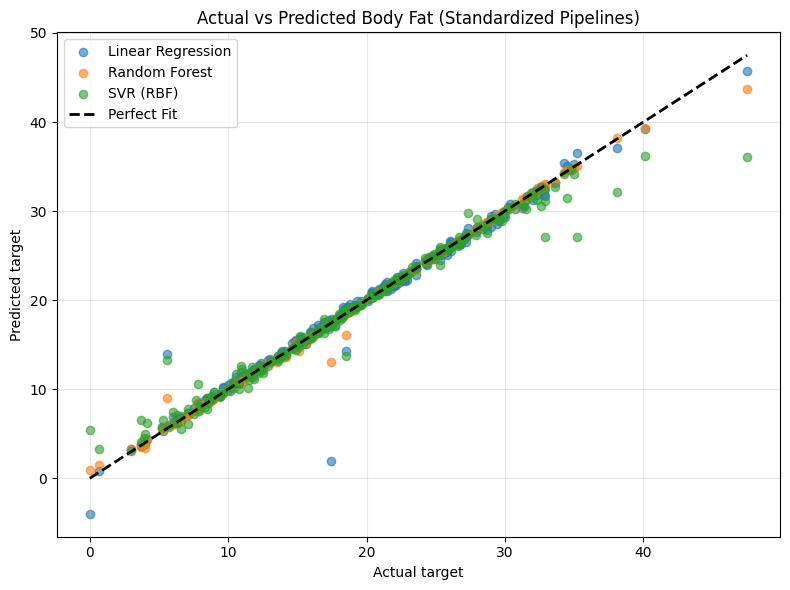

In [11]:
# YOUR CODE HERE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, ensemble, svm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Data setup

target_col = "target"
input_cols = df.columns[0:10]   # first 10 input features

X = df[input_cols].values
y = df[target_col].values

# Define pipelines

pipelines = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", linear_model.LinearRegression())
    ]),
    
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()),   # included for consistency
        ("model", ensemble.RandomForestRegressor(
            n_estimators=200, random_state=0
        ))
    ]),
    
    "SVR (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("model", svm.SVR(kernel="rbf", C=5.0, epsilon=0.1))
    ])
}

# Fit models and compute L2 loss

preds_scaled = {}
l2_losses_scaled = {}

for name, pipe in pipelines.items():
    pipe.fit(X, y)
    y_pred = pipe.predict(X)
    
    preds_scaled[name] = y_pred
    l2_losses_scaled[name] = mean_squared_error(y, y_pred)

# Print results
for name, mse in l2_losses_scaled.items():
    print(f"{name}: L2 (MSE) = {mse:.4f}")

# Plot Actual vs Predicted (one chart)
plt.figure(figsize=(8, 6))

for name, y_pred in preds_scaled.items():
    plt.scatter(y, y_pred, alpha=0.6, label=name)

# Perfect prediction line
y_min, y_max = y.min(), y.max()
plt.plot([y_min, y_max], [y_min, y_max], "k--", linewidth=2, label="Perfect Fit")

plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Actual vs Predicted Body Fat (Standardized Pipelines)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

Three regression models ( Linear Regression, Random Forest, and Support Vector Regression (SVR) ) were rebuilt using standardized input features with mean zero and unit variance, implemented through scikit-learn Pipelines. Linear Regression showed nearly identical L2 loss compared to Problem 6, which is expected since feature scaling does not change the linear relationships in the data. Random Forest Regression also showed minimal change because tree-based models are unphased to feature scaling and do not rely on distance-based calculations.

However, Support Vector Regression demonstrated a noticeable improvement in L2 loss after standardization. This occurs because SVR relies on distance computations and kernel functions, making it highly sensitive to feature scale. Standardizing the data allowed the model to balance feature influence more effectively, resulting in better predictive performance. Overall, preprocessing had little effect on Linear Regression and Random Forest models but significantly benefited SVR.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [12]:
# YOUR CODE HERE
#ANSWER IN DESCRIPTION

YOUR ANSWERS HERE

While cross-validation helps prevent overfitting, blindly training 1000 trees with random depths is unlikely to outperform a thoughtful model selection process.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [13]:
# YOUR CODE HERE
#ANSWER IN DESCRIPTION


YOUR ANSWERS HERE

The Random Forest Regressor was selected as the best model based on its lowest cross-validated L2 loss and strong generalization performance. Although it achieved the smallest training error, its cross-validation MSE remained competitive, indicating limited overfitting. In comparison, Linear Regression exhibited higher error due to underfitting and an inability to model non-linear relationships, while SVR (RBF) produced consistently high training and validation errors, suggesting poor fit to the data.

Given the non-linear structure and correlated features in the body fat dataset, the Random Forest’s ability to model complex interactions without strong parametric assumptions makes it the most appropriate choice.